In [1]:
import numpy as np
from PySDM.physics import si

from PySDM_examples.Singer_Ward.aerosol import AerosolBetaCaryophylleneDark
from PySDM_examples.Singer_Ward.kappa_mcmc import param_transform, MCMC
# from PySDM_examples.Singer_Ward.mcmc_plots import plot_param_chain, plot_corner, plot_ovf_kappa_fit, plot_keff

import warnings
from numba.core.errors import NumbaExperimentalFeatureWarning

In [2]:
ds = np.loadtxt("data/bcary_dark.csv",skiprows=1,delimiter=",")
ds = np.delete(ds, [26,65], axis=0) # remove outliers
r_dry = ds[:,0]/2*1e-9
ovf = np.minimum(ds[:,1], 0.99)
d_ovf = ds[:,2]
kappa_eff = ds[:,3]
d_kappa_eff = ds[:,4]
T = 300 * si.K

datay = kappa_eff
errory = d_kappa_eff

# pylab.figure(figsize=(8,6))
# pylab.rcParams.update({'font.size':20})
# pylab.errorbar(ovf, kappa_eff, yerr=d_kappa_eff, xerr=d_ovf, fmt='ko')
# pylab.xlabel("OVF")
# pylab.ylabel("$\kappa_{eff}$")
# pylab.rcParams.update({'font.size':20})
# pylab.grid()
# pylab.show()

In [8]:
# Ovad
model = "CompressedFilmOvadnevaite"
params = [0.5, 0.2]
stepsize = [0.1, 0.1]

# # SL
# model = "SzyszkowskiLangmuir"
# params = [40, -13.0, 3.0] # [20, -12.0, 3.9]
# stepsize = [0.5, 0.1, 0.05]

# # Ruehl
# model = "CompressedFilmRuehl"
# params = [50, -13.0, 3.0, 1.0] #[15.1, -12.0, 3.3, 0.8]
# stepsize = [0.5, 0.05, 0.01, 0.05] #[0.1, 0.05, 0.01, 0.05]

print(param_transform(params, model))

# c = AerosolBetaCaryophylleneDark(ovf)
# args = [T, r_dry, ovf, c, model]
aerosol_list = [AerosolBetaCaryophylleneDark(ovfi) for ovfi in ovf]
args = [T, r_dry, ovf, aerosol_list, model]

# print("DEFAULT LOOP")
# from importlib import reload
# import PySDM_examples.Singer_Ward.kappa_mcmc
# reload(PySDM_examples.Singer_Ward.kappa_mcmc)
# from PySDM_examples.Singer_Ward.kappa_mcmc import param_transform, MCMC

# n_steps = 10
# with warnings.catch_warnings():
#     warnings.simplefilter('ignore', category=NumbaExperimentalFeatureWarning)
#     param_chain, accept_chain, chi2_chain = MCMC(params, stepsize, args, datay, errory, n_steps)
# p = param_transform(param_chain, model)

# print(p[:,-1])
# print(param_chain[:,-1])


print("JITTED code")
from importlib import reload
import PySDM_examples.Singer_Ward.kappa_mcmc_jit
reload(PySDM_examples.Singer_Ward.kappa_mcmc_jit)
from PySDM_examples.Singer_Ward.kappa_mcmc_jit import param_transform, MCMC

n_steps = 10
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=NumbaExperimentalFeatureWarning)
    param_chain, accept_chain, chi2_chain = MCMC(params, stepsize, args, datay, errory, n_steps)
p = param_transform(param_chain, model)

print(p[:,-1])
print(param_chain[:,-1])

[44.81707185  1.22140276]
JITTED code
step time:  4.586323261260986
step time:  1.923379898071289
step time:  1.9401779174804688
step time:  2.4689111709594727
step time:  2.1979448795318604
step time:  1.870783805847168
step time:  2.2343647480010986
step time:  1.8840010166168213
step time:  2.2408339977264404
step time:  2.065967082977295
[37.57920618  1.23844854]
[0.08779002 0.21385942]


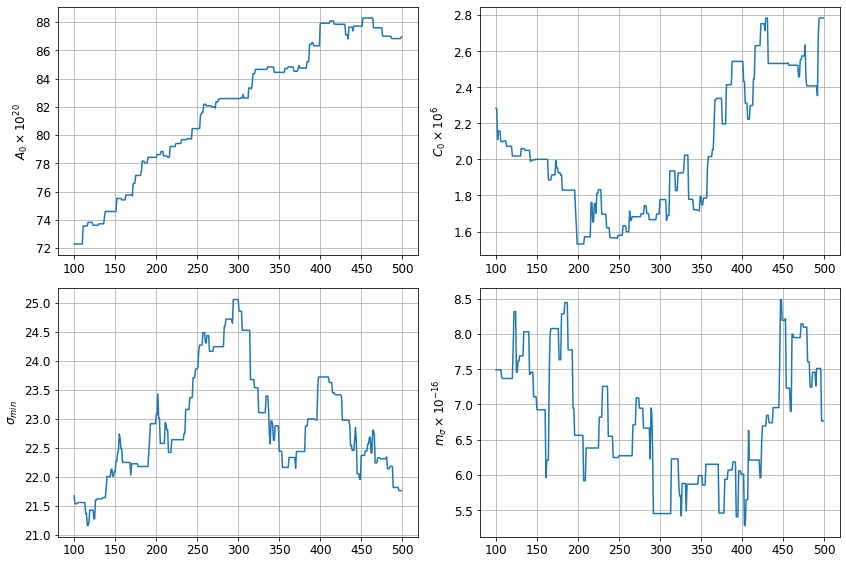

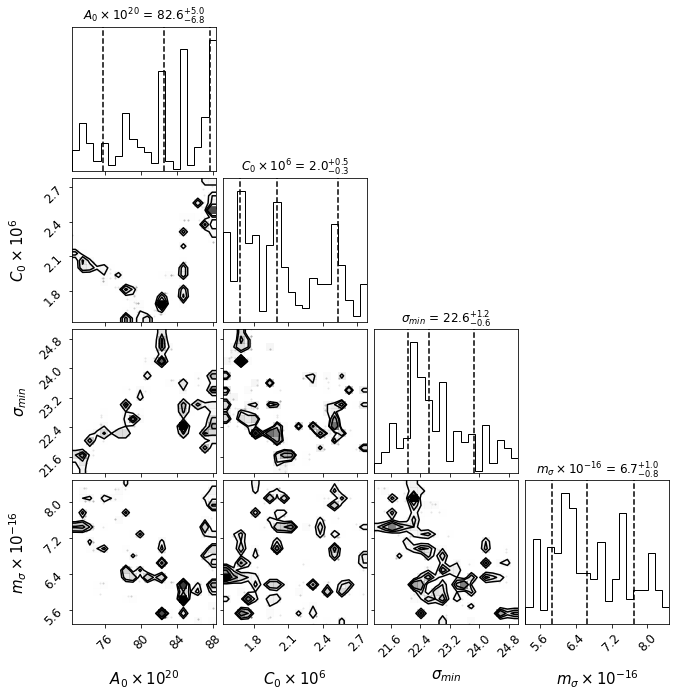

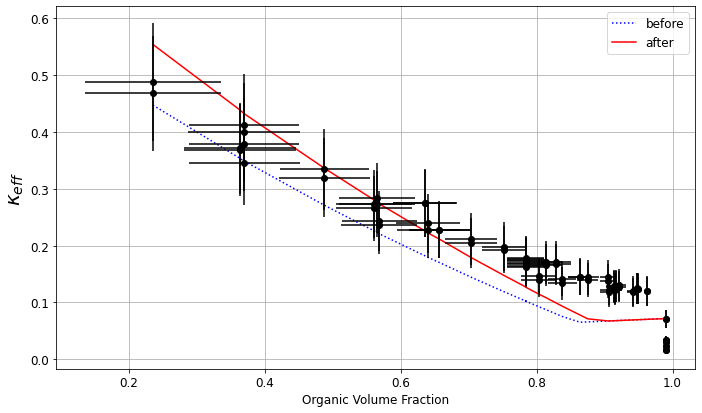

<Figure size 720x432 with 0 Axes>

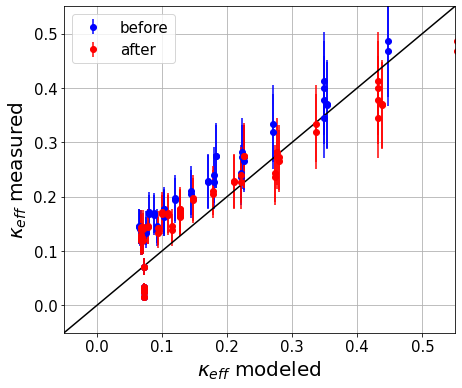

In [45]:
from importlib import reload
import PySDM_examples.Singer_Ward.mcmc_plots
reload(PySDM_examples.Singer_Ward.mcmc_plots)
from PySDM_examples.Singer_Ward.mcmc_plots import plot_param_chain, plot_corner, plot_ovf_kappa_fit, plot_keff
import os

if not os.path.isdir("mcmc_output/"):
    os.mkdir("mcmc_output/")
plot_param_chain(param_chain, args)
plot_corner(param_chain, args)
plot_ovf_kappa_fit(param_chain, args, d_ovf, datay, errory)
plot_keff(param_chain, args, datay, errory)